In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean, cityblock, cosine, correlation
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("u.data", sep='\t', names=["user id", "item id", "rating", "timestamp"])
data=data.drop(columns=["timestamp"])
data

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

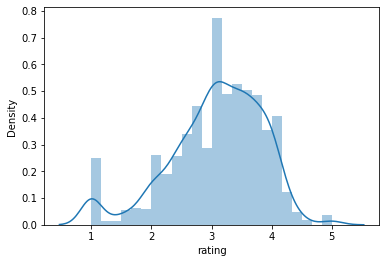

In [3]:
sns.distplot(data.groupby("item id")['rating'].mean())

In [4]:
median=data.groupby("item id")['rating'].mean().sort_values(ascending=False).median()

In [5]:
data.groupby("item id")['rating'].mean()[1]

3.8783185840707963

In [6]:
info=pd.read_csv("u.info", sep='|')
info

,943 users
0,1682 items
1,100000 ratings


In [51]:
item=pd.read_csv("u.item", sep='|', names=["movie id","movie title", "release date", "video release date",
            "IMDb URL","unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
            "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"],encoding='latin-1')
item

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


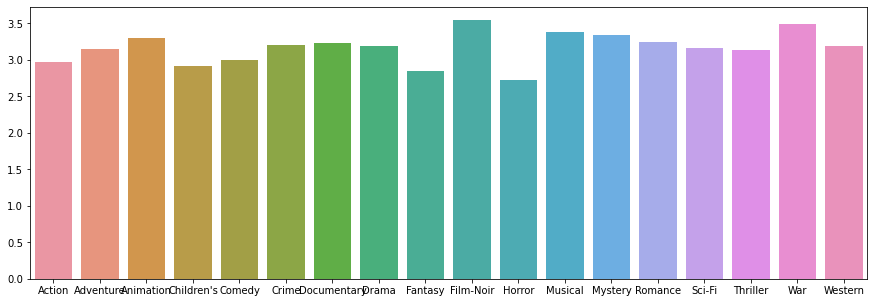

In [8]:
k=data.groupby("item id")['rating'].mean()
kind=["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
            "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
rating=[k[item[item[i]==1]['movie id']].mean() for i in kind]
plt.figure(figsize=(15,5))
sns.barplot(x=kind,y=rating)
plt.show()

In [9]:
genre=pd.read_csv("u.genre", sep='|', names=["Genre","#"])
genre

,Genre,#
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [10]:
user=pd.read_csv("u.user", sep='|', names=["user id","age", "gender", "occupation","zip code"])
user

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [11]:
occupation=pd.read_csv("u.occupation", sep='|')
occupation

,administrator
0,artist
1,doctor
2,educator
3,engineer
4,entertainment
5,executive
6,healthcare
7,homemaker
8,lawyer
9,librarian


In [12]:
data["user id"].value_counts()
# each user has rated at least 20 movies, no need to clean

405    737
655    685
13     636
450    540
276    518
      ... 
571     20
364     20
812     20
572     20
895     20
Name: user id, Length: 943, dtype: int64

In [13]:
MoviePerUser=data["item id"].value_counts()
MoviePerUser

50      583
258     509
100     508
181     507
294     485
       ... 
1543      1
1583      1
1647      1
711       1
1663      1
Name: item id, Length: 1682, dtype: int64

In [14]:
item = item.set_index('movie id')
item

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
movie_genre = item.drop(columns=['movie title', 'release date', 'video release date', 'IMDb URL'])
movie_genre

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [16]:
movie_name = item.drop(item.iloc[:,1:], axis=1)
movie_name

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [17]:
def movie_recommender(distance_method, movie_id, N=1682):
    df_distance = pd.DataFrame(data=movie_genre.index)
    df_distance = df_distance[movie_genre.index != movie_id]
    df_distance['distance'] = df_distance['movie id'].apply(lambda x: distance_method(movie_genre.loc[x],movie_genre.loc[movie_id]))
    df_distance.sort_values(by='distance',inplace=True)
    return(df_distance.head(N))

In [18]:
df_distance1=movie_recommender(euclidean, 1681)
df_distance1

,movie id,distance
1287,1288,0.000000
1048,1049,0.000000
1536,1537,0.000000
1050,1051,0.000000
1269,1270,0.000000
...,...,...
854,855,2.449490
49,50,2.449490
100,101,2.449490
171,172,2.645751


In [19]:
closestdis1=df_distance1[df_distance1['distance']==0]['movie id']

In [20]:
movie_genre.loc[closestdis1,:]

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1537,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1051,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
688,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
neardis1=df_distance1[df_distance1['distance']==1]['movie id']
movie_genre.loc[neardis1,:].head(10)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
481,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
354,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
352,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1296,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1339,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
409,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
df_distance2=movie_recommender(cosine, 1681)
df_distance2

,movie id,distance
1093,1094,0.0
1287,1288,0.0
368,369,0.0
1091,1092,0.0
1092,1093,0.0
...,...,...
649,650,1.0
648,649,1.0
646,647,1.0
657,658,1.0


In [23]:
closestdis2=df_distance2[df_distance2['distance']==0]['movie id']

In [24]:
movie_genre.loc[closestdis2,:]

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1094,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
369,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1093,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
neardis2=df_distance2[df_distance2['distance']!=0]['movie id']
movie_genre.loc[neardis2,:]

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1472,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
630,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1197,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1465,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
649,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
647,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [26]:
df_distance3=movie_recommender(correlation, 1681)
df_distance3

,movie id,distance
1497,1498,0.000000
250,251,0.000000
1091,1092,0.000000
248,249,0.000000
241,242,0.000000
...,...,...
100,101,1.140859
754,755,1.140859
49,50,1.140859
425,426,1.160128


In [27]:
closestdis3=df_distance3[df_distance3['distance']==0]['movie id']

In [28]:
movie_genre.loc[closestdis3,:]

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1498,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
819,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
neardis3=df_distance3[df_distance3['distance']!=1]['movie id']
movie_genre.loc[neardis3,:]

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1498,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
755,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
50,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


In [30]:
df_distance1.reset_index(inplace=True)
df_distance1

,index,movie id,distance
0,1287,1288,0.000000
1,1048,1049,0.000000
2,1536,1537,0.000000
3,1050,1051,0.000000
4,1269,1270,0.000000
...,...,...,...
1676,854,855,2.449490
1677,49,50,2.449490
1678,100,101,2.449490
1679,171,172,2.645751


In [31]:
cnt=0
result0=[]
for i in range(len(df_distance1['distance'])-1):
    if df_distance1['distance'][i+1]==df_distance1['distance'][i]:
        result0.append(cnt)
    else:
        cnt+=1
        result0.append(cnt)
result0.append(cnt)
result0

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [32]:
df_distance1['distance']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1676    2.449490
1677    2.449490
1678    2.449490
1679    2.645751
1680    2.645751
Name: distance, Length: 1681, dtype: float64

In [33]:
df_distance2.reset_index(inplace=True)
df_distance2

,index,movie id,distance
0,1093,1094,0.0
1,1287,1288,0.0
2,368,369,0.0
3,1091,1092,0.0
4,1092,1093,0.0
...,...,...,...
1676,649,650,1.0
1677,648,649,1.0
1678,646,647,1.0
1679,657,658,1.0


In [34]:
cnt=0
result=[]
for i in range(len(df_distance2['distance'])-1):
    if df_distance2['distance'][i+1]==df_distance2['distance'][i]:
        result.append(cnt)
    else:
        cnt+=1
        result.append(cnt)
result.append(cnt)
result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [35]:
df_distance2

,index,movie id,distance
0,1093,1094,0.0
1,1287,1288,0.0
2,368,369,0.0
3,1091,1092,0.0
4,1092,1093,0.0
...,...,...,...
1676,649,650,1.0
1677,648,649,1.0
1678,646,647,1.0
1679,657,658,1.0


In [36]:
df_distance3.reset_index(inplace=True)

In [37]:
cnt=0
result2=[]
for i in range(len(df_distance3['distance'])-1):
    if df_distance3['distance'][i+1]==df_distance3['distance'][i]:
        result2.append(cnt)
    else:
        cnt+=1
        result2.append(cnt)
result2.append(cnt)
result2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,


In [38]:
df_distance2['Euclidean']=result0
df_distance2['Cosine']=result

In [39]:
df_distance2['Correlation']=result2
#df_distance2=df_distance2.drop(["distance"],1)
df_distance2

,index,movie id,distance,Euclidean,Cosine,Correlation
0,1093,1094,0.0,0,0,0
1,1287,1288,0.0,0,0,0
2,368,369,0.0,0,0,0
3,1091,1092,0.0,0,0,0
4,1092,1093,0.0,0,0,0
...,...,...,...,...,...,...
1676,649,650,1.0,6,6,15
1677,648,649,1.0,6,6,15
1678,646,647,1.0,7,6,16
1679,657,658,1.0,7,6,16


In [40]:
df_distance2['Cosine']!=df_distance2['Correlation']

0       False
1       False
2       False
3       False
4       False
        ...  
1676     True
1677     True
1678     True
1679     True
1680     True
Length: 1681, dtype: bool

In [41]:
df_distance3

,index,movie id,distance
0,1497,1498,0.000000
1,250,251,0.000000
2,1091,1092,0.000000
3,248,249,0.000000
4,241,242,0.000000
...,...,...,...
1676,100,101,1.140859
1677,754,755,1.140859
1678,49,50,1.140859
1679,425,426,1.160128


In [42]:
data

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [43]:
Top10=movie_recommender(cosine, 1)[0:10]
Top10

,movie id,distance
421,422,0.000000
1218,1219,0.133975
94,95,0.133975
239,240,0.183503
242,243,0.183503
968,969,0.183503
995,996,0.183503
260,261,0.183503
622,623,0.183503
624,625,0.183503


In [53]:
Top10=movie_recommender(cosine, 1681)[0:10]
Top10['movie name']=Top10['movie id'].apply(lambda x: item[item['movie id']==x].iloc[0,1])
Top10

,movie id,distance,movie name
1093,1094,0.0,"Thin Line Between Love and Hate, A (1996)"
1287,1288,0.0,Denise Calls Up (1995)
368,369,0.0,Black Sheep (1996)
1091,1092,0.0,Dear God (1996)
1092,1093,0.0,Live Nude Girls (1995)
1176,1177,0.0,Dunston Checks In (1996)
367,368,0.0,Bio-Dome (1996)
366,367,0.0,Clueless (1995)
1094,1095,0.0,High School High (1996)
1097,1098,0.0,Flirting With Disaster (1996)


In [ ]:
item[item['movie id']==1].iloc[0,1]

In [47]:
Top10['movie id']

1093    1094
1287    1288
368      369
1091    1092
1092    1093
1176    1177
367      368
366      367
1094    1095
1097    1098
Name: movie id, dtype: int64

In [52]:
item['movie id']

0          1
1          2
2          3
3          4
4          5
        ... 
1677    1678
1678    1679
1679    1680
1680    1681
1681    1682
Name: movie id, Length: 1682, dtype: int64